# Współczesne metody heurystyczne
## PB14 - Wykorzystanie algorytmu ewolucyjnego do doboru parametrów SVM do zadania klasyfikacji
### Agnieszka Czaplicka, Bartosz Sowul

# test: instalacja potrzebnych modułów

In [9]:
!pip install pathos
!pip install tqdm
!pip install matplotlib
!pip install pandas
!pip install numexpr
!pip install numpy
!pip install scikit_learn

## test: czy jupyter widzi nasz moduł?

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -0.13025115138048743



gen: 5
avg time per gen: 0.6
Best params:
C: 0.7826440095590191
Gamma: 0.4974149144453282
neg_log_loss: -0.1196769516672147



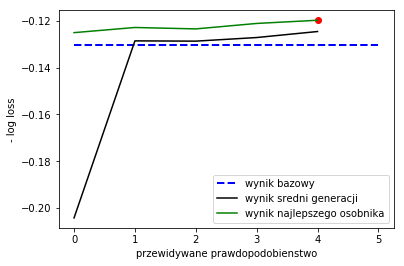

In [10]:
from ga.evoalgo_svm import EvoAlgo

from sklearn.datasets import load_iris
from sklearn.svm import SVC

clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='auto')
ea = EvoAlgo(clf, pop_members=60, max_iter=5)
iris = load_iris()
ea.fit(iris.data, iris.target)

ea.get_params()
ea.plot()

## Ładowanie danych

## Open In Colab Badge

Anybody can open a copy of any github-hosted notebook within Colab. To make it easier to give people access to live views of GitHub-hosted notebooks,
colab provides a [shields.io](http://shields.io/)-style badge, which appears as follows:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

The markdown for the above badge is the following:

```markdown
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
```

The HTML equivalent is:

```HTML
<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
```

Remember to replace the notebook URL in this template with the notebook you want to link to.